In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
animedata = pd.read_csv('animeTV_MachineLearning.csv')
animedata.head()

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,8521,21743,Donten ni Warau,800,"Action, Historical, Shoujo, Supernatural",Laughing Under the Clouds,曇天に笑う,TV,12,"Oct 4, 2014 to Dec 20, 2014",...,1,0,0,0,0,0,0,0,0,0
1,2988,3372,RGB Adventure,0,Adventure,RGB Adventure,RGBアドベンチャ,TV,6,"Nov 19, 2006 to Dec 24, 2006",...,0,0,0,0,0,0,0,1,0,0
2,5765,9424,Seupideuwang Beongae,700,"Action, Game, School, Shounen, Sports",Wings of Dragon,스피드왕 번개,TV,26,"May 18, 1998 to Aug 18, 1998",...,0,0,0,0,0,0,0,1,0,0
3,1675,1839,Jagainu-kun,700,"Adventure, Fantasy, Kids, Shoujo, Slice of Life",Unknown,じゃがいぬくん,TV,26,"Apr 4, 2004 to Jul 18, 2004",...,0,0,0,0,0,0,0,1,0,0
4,11462,32670,Battle Spirits: Double Drive,600,"Game, Fantasy",Unknown,バトルスピリッツ ダブルドライブ,TV,51,"Apr 6, 2016 to Mar 29, 2017",...,0,0,0,0,0,0,0,0,0,0


# Machine Learning



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9958904109589041

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5245901639344263



Accuracy 	Train Dataset
True Positive Rate 	: 99.72222222222223
False Positive Rate 	: 0.5405405405405406
Accuracy 	Test Dataset
True Positive Rate 	: 48.10126582278481
False Positive Rate 	: 44.230769230769226
ACCURACY OF THE MODEL:  0.5245901639344263


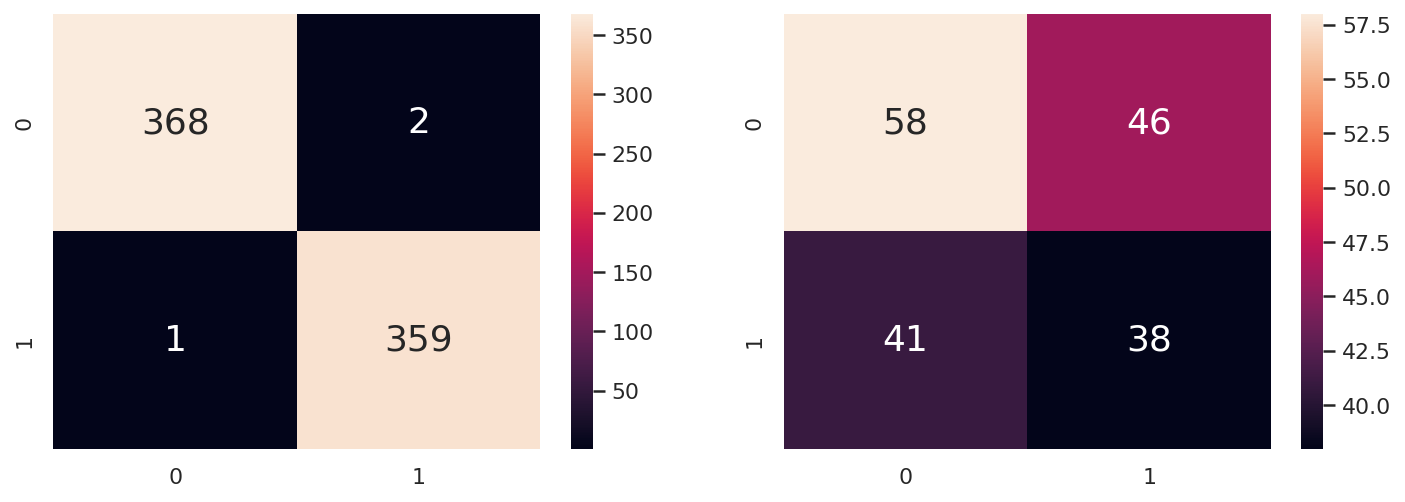

In [3]:
#Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
SP = pd.DataFrame(animedata[["Score", "Ranked", "isManga"]])   # Predictors
HS = pd.DataFrame(animedata['HasSequel'])    # Response

X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)
# Check the sample sizes
#print("Train Set :", y_train.shape, X_train.shape)
#print("Test Set  :", y_test.shape, X_test.shape)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train.values, y_train.values.ravel())

# performing predictions on the test dataset
y_pred = clf.predict(X_test.values)

# metrics are used to find accuracy or error
from sklearn import metrics
#print()

y_train_pred = clf.predict(X_train.values)
y_test_pred = clf.predict(X_test.values)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train.values, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test.values, y_test))
print()

from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100
print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

# using metrics module for accuracy calculation
x = metrics.accuracy_score(y_test, y_pred)

print("ACCURACY OF THE MODEL: ", x)